In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the tables
df = pd.read_csv('data/complaints_users.csv')
df2 = pd.read_csv('data/complaints_companies.csv')
df3 = pd.read_csv('data/products.csv')
df4 = pd.read_csv('data/issues.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Join the tables into one dataframe
df = df.merge(df2, how='left', on='COMPLAINT_ID')
df = df.merge(df3, how='left', on='PRODUCT_ID')
df = df.merge(df4, how='left', on='ISSUE_ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383066 entries, 0 to 383065
Data columns (total 15 columns):
COMPLAINT_ID                  383066 non-null int64
COMPLAINT_TEXT                383066 non-null object
WAS_USER_DISPUTED             164076 non-null object
DATE_x                        383066 non-null object
PRODUCT_ID                    383066 non-null int64
ISSUE_ID                      383066 non-null int64
COMPANY                       383066 non-null object
COMPANY_RESPONSE_TO_USER      383062 non-null object
COMPANY_RESPONSE_TO_PUBLIC    182503 non-null object
WAS_RESPONSE_TIMELY           383066 non-null object
DATE_y                        383066 non-null object
MAIN_PRODUCT                  383066 non-null object
SUB_PRODUCT                   330893 non-null object
MAIN_ISSUE                    383066 non-null object
SUB_ISSUE                     269463 non-null object
dtypes: int64(3), object(12)
memory usage: 46.8+ MB


In [5]:
df['MAIN_PRODUCT'].nunique()

18

In [6]:
df['SUB_PRODUCT'].nunique()

75

In [7]:
df['MAIN_ISSUE'].nunique()

161

In [8]:
df['SUB_ISSUE'].nunique()

215

### Questions:
Why so many null values in `WAS_USER_DISPUTED` and `COMPANY_RESPONSE_TO_PUBLIC`?  
Why are there some missing data in `SUB_ISSUE` and `SUB_PRODUCT`?  

In [9]:
df['WAS_USER_DISPUTED'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [10]:
df['COMPANY_RESPONSE_TO_PUBLIC'].unique()

array(['Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company disputes the facts presented in the complaint',
       'Company believes the complaint is the result of a misunderstanding',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes complaint is the result of an isolated error',
       nan,
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       "Company can't verify or dispute the facts in the complaint",
       'Company believes complaint relates to a discontinued policy or procedure',
       'Company chooses not to provide a public response'], dtype=object)

In [11]:
df[df['WAS_USER_DISPUTED'] == 'No'].count()

COMPLAINT_ID                  128269
COMPLAINT_TEXT                128269
WAS_USER_DISPUTED             128269
DATE_x                        128269
PRODUCT_ID                    128269
ISSUE_ID                      128269
COMPANY                       128269
COMPANY_RESPONSE_TO_USER      128268
COMPANY_RESPONSE_TO_PUBLIC     61808
WAS_RESPONSE_TIMELY           128269
DATE_y                        128269
MAIN_PRODUCT                  128269
SUB_PRODUCT                    87153
MAIN_ISSUE                    128269
SUB_ISSUE                      65989
dtype: int64

In [12]:
df[df['WAS_USER_DISPUTED'] == 'Yes'].count()

COMPLAINT_ID                  35807
COMPLAINT_TEXT                35807
WAS_USER_DISPUTED             35807
DATE_x                        35807
PRODUCT_ID                    35807
ISSUE_ID                      35807
COMPANY                       35807
COMPANY_RESPONSE_TO_USER      35807
COMPANY_RESPONSE_TO_PUBLIC    16314
WAS_RESPONSE_TIMELY           35807
DATE_y                        35807
MAIN_PRODUCT                  35807
SUB_PRODUCT                   24750
MAIN_ISSUE                    35807
SUB_ISSUE                     17091
dtype: int64

In [13]:
df[df['WAS_USER_DISPUTED'].isna()].count()

COMPLAINT_ID                  218990
COMPLAINT_TEXT                218990
WAS_USER_DISPUTED                  0
DATE_x                        218990
PRODUCT_ID                    218990
ISSUE_ID                      218990
COMPANY                       218990
COMPANY_RESPONSE_TO_USER      218987
COMPANY_RESPONSE_TO_PUBLIC    104381
WAS_RESPONSE_TIMELY           218990
DATE_y                        218990
MAIN_PRODUCT                  218990
SUB_PRODUCT                   218990
MAIN_ISSUE                    218990
SUB_ISSUE                     186383
dtype: int64

In [14]:
df[df['WAS_USER_DISPUTED'].notna()].count()

COMPLAINT_ID                  164076
COMPLAINT_TEXT                164076
WAS_USER_DISPUTED             164076
DATE_x                        164076
PRODUCT_ID                    164076
ISSUE_ID                      164076
COMPANY                       164076
COMPANY_RESPONSE_TO_USER      164075
COMPANY_RESPONSE_TO_PUBLIC     78122
WAS_RESPONSE_TIMELY           164076
DATE_y                        164076
MAIN_PRODUCT                  164076
SUB_PRODUCT                   111903
MAIN_ISSUE                    164076
SUB_ISSUE                      83080
dtype: int64

In [15]:
df[df['SUB_ISSUE'].isna()].count()

COMPLAINT_ID                  113603
COMPLAINT_TEXT                113603
WAS_USER_DISPUTED              80996
DATE_x                        113603
PRODUCT_ID                    113603
ISSUE_ID                      113603
COMPANY                       113603
COMPANY_RESPONSE_TO_USER      113602
COMPANY_RESPONSE_TO_PUBLIC     54148
WAS_RESPONSE_TIMELY           113603
DATE_y                        113603
MAIN_PRODUCT                  113603
SUB_PRODUCT                    93018
MAIN_ISSUE                    113603
SUB_ISSUE                          0
dtype: int64

In [16]:
# Are sub-issues associated with any particular main-issues?
df[df['SUB_ISSUE'].isna()]['MAIN_ISSUE'].unique()

array(['Applying for a mortgage or refinancing an existing mortgage',
       'Closing on a mortgage', 'Trouble during payment process',
       'Struggling to pay mortgage', 'Fraud or scam',
       'Problem with customer service',
       'Problem with fraud alerts or security freezes',
       'Other transaction problem',
       'Incorrect information on your report',
       'Struggling to pay your loan',
       "Received a loan you didn't apply for",
       'Problem when making payments',
       'Problem with the payoff process at the end of the loan',
       'Money was taken from your bank account on the wrong day or for the wrong amount',
       'Unexpected or other fees',
       'Unauthorized transactions or other transaction problem',
       'Getting the loan', 'Money was not available when promised',
       "Charged fees or interest you didn't expect",
       'Vehicle was damaged or destroyed the vehicle',
       'Problem adding money', 'Lost or stolen money order',
       'Managin

In [17]:
df[df['SUB_ISSUE'].notna()]['MAIN_ISSUE'].unique()

array(["Problem with a credit reporting company's investigation into an existing problem",
       'Incorrect information on your report',
       'Attempts to collect debt not owed',
       'Written notification about debt', 'Struggling to repay your loan',
       'Improper use of your report', 'Fees or interest',
       'Communication tactics', 'Closing an account',
       'Credit monitoring or identity theft protection services',
       'False statements or representation',
       'Took or threatened to take negative or legal action',
       'Problem with a lender or other company charging your account',
       'Managing an account',
       'Unable to get your credit report or credit score',
       'Other features, terms, or problems',
       'Problem caused by your funds being low', 'Closing your account',
       'Dealing with your lender or servicer', 'Opening an account',
       'Advertising and marketing, including promotional offers',
       'Problem with a purchase shown on your

In [18]:
# Are there any main-issues that occur both when sub-issues are null and when not null?
intersection = df[df['SUB_ISSUE'].isna()]['MAIN_ISSUE'].unique()
intersection[np.in1d(intersection, df[df['SUB_ISSUE'].notna()]['MAIN_ISSUE'].unique())]

array(['Incorrect information on your report',
       'Struggling to pay your loan', 'Problem when making payments',
       "Problem with a credit reporting company's investigation into an existing problem",
       'Improper use of your report',
       'Unable to get your credit report or credit score',
       'Credit monitoring or identity theft protection services',
       'Managing the loan or lease'], dtype=object)

In [19]:
# What about products?
intersection = df[df['SUB_ISSUE'].isna()]['MAIN_PRODUCT'].unique()
intersection[np.in1d(intersection, df[df['SUB_ISSUE'].notna()]['MAIN_PRODUCT'].unique())]

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan, title loan, or personal loan',
       'Credit card or prepaid card', 'Student loan',
       'Checking or savings account', 'Vehicle loan or lease'],
      dtype=object)

In [20]:
# What about company response?
intersection = df[df['COMPANY_RESPONSE_TO_PUBLIC'].isna()]['MAIN_PRODUCT'].unique()
intersection[np.in1d(intersection, df[df['COMPANY_RESPONSE_TO_PUBLIC'].notna()]['MAIN_PRODUCT'].unique())]

array(['Student loan',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Credit card or prepaid card',
       'Checking or savings account', 'Mortgage',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease',
       'Money transfer, virtual currency, or money service',
       'Credit card', 'Credit reporting', 'Consumer Loan',
       'Bank account or service', 'Prepaid card', 'Money transfers',
       'Other financial service', 'Payday loan', 'Virtual currency'],
      dtype=object)

In [21]:
df[df['WAS_USER_DISPUTED'].isna()]['MAIN_PRODUCT'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Student loan', 'Credit card or prepaid card',
       'Mortgage', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease'], dtype=object)

In [22]:
df[df['WAS_USER_DISPUTED'].notna()]['MAIN_PRODUCT'].unique()

array(['Credit card', 'Credit reporting', 'Bank account or service',
       'Debt collection', 'Consumer Loan', 'Prepaid card', 'Mortgage',
       'Student loan', 'Money transfers', 'Payday loan',
       'Other financial service', 'Virtual currency'], dtype=object)

In [23]:
intersection = df[df['WAS_USER_DISPUTED'].isna()]['MAIN_PRODUCT'].unique()
intersection[np.in1d(intersection, df[df['WAS_USER_DISPUTED'].notna()]['MAIN_PRODUCT'].unique())]

array(['Debt collection', 'Student loan', 'Mortgage'], dtype=object)

In [24]:
# Which products do not have a sub-product?
df[df['SUB_PRODUCT'].isna()]['MAIN_PRODUCT'].unique()

array(['Credit card', 'Credit reporting', 'Payday loan'], dtype=object)

In [25]:
df[df['SUB_PRODUCT'].notna()]['MAIN_PRODUCT'].unique()

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Debt collection', 'Student loan', 'Credit card or prepaid card',
       'Mortgage', 'Checking or savings account',
       'Money transfer, virtual currency, or money service',
       'Payday loan, title loan, or personal loan',
       'Vehicle loan or lease', 'Bank account or service',
       'Consumer Loan', 'Prepaid card', 'Money transfers',
       'Other financial service', 'Virtual currency'], dtype=object)

In [26]:
# Are the different sub-products unique to single products?
products = {}
for product in df['MAIN_PRODUCT'].unique():
    products[product] = df[df['MAIN_PRODUCT'] == product]['SUB_PRODUCT'].unique().tolist()

seen = set()
duplicates = set()
for main_product in products.values():
    for sub_product in set(main_product):
        if sub_product in seen:
            duplicates.add(sub_product)
        else:
            seen.add(sub_product)
duplicates

{'Checking account',
 'Conventional home mortgage',
 'Debt settlement',
 'Domestic (US) money transfer',
 'Foreign currency exchange',
 'Installment loan',
 'International money transfer',
 'Money order',
 'Non-federal student loan',
 'Pawn loan',
 'Payday loan',
 'Payroll card',
 'Personal line of credit',
 'Refund anticipation check',
 'Savings account',
 'Title loan',
 nan}

In [27]:
# Find duplicate sub-products and which product they're associated with
for sub_product in duplicates:
    for product in products:
        if sub_product in products[product]:
            print('{}   :   {}'.format(sub_product, product))
    print()

nan   :   Credit card
nan   :   Credit reporting
nan   :   Payday loan

Savings account   :   Checking or savings account
Savings account   :   Bank account or service

Domestic (US) money transfer   :   Money transfer, virtual currency, or money service
Domestic (US) money transfer   :   Money transfers
Domestic (US) money transfer   :   Virtual currency

Installment loan   :   Payday loan, title loan, or personal loan
Installment loan   :   Consumer Loan

Personal line of credit   :   Checking or savings account
Personal line of credit   :   Payday loan, title loan, or personal loan
Personal line of credit   :   Consumer Loan

International money transfer   :   Money transfer, virtual currency, or money service
International money transfer   :   Money transfers
International money transfer   :   Virtual currency

Money order   :   Money transfer, virtual currency, or money service
Money order   :   Other financial service

Non-federal student loan   :   Debt collection
Non-federal st

In [28]:
# Are the different sub-products unique to single product IDs?
products = {}
for product in df['PRODUCT_ID'].unique():
    products[product] = df[df['PRODUCT_ID'] == product]['SUB_PRODUCT'].unique().tolist()

seen = set()
duplicates = set()
for main_product in products.values():
    for sub_product in set(main_product):
        if sub_product in seen:
            duplicates.add(sub_product)
        else:
            seen.add(sub_product)
duplicates

{'Checking account',
 'Conventional home mortgage',
 'Debt settlement',
 'Domestic (US) money transfer',
 'Foreign currency exchange',
 'Installment loan',
 'International money transfer',
 'Money order',
 'Non-federal student loan',
 'Pawn loan',
 'Payday loan',
 'Payroll card',
 'Personal line of credit',
 'Refund anticipation check',
 'Savings account',
 'Title loan',
 nan}

In [29]:
# How many complaints are there for each product_id?
df['COMPLAINT_COUNTS'] = df.groupby('PRODUCT_ID')['COMPLAINT_ID'].transform('count')
df.head()

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE_x,PRODUCT_ID,ISSUE_ID,COMPANY,COMPANY_RESPONSE_TO_USER,COMPANY_RESPONSE_TO_PUBLIC,WAS_RESPONSE_TIMELY,DATE_y,MAIN_PRODUCT,SUB_PRODUCT,MAIN_ISSUE,SUB_ISSUE,COMPLAINT_COUNTS
0,3184195,XXXX and Transunion are reporting incorrectly...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994
1,3184692,XXXX and Transunion are reporting incorrectly ...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994
2,3183613,"XXXX, XXXX, and Experian need to remove the co...",NaN,03/18/2019,26,165,Experian Information Solutions Inc.,Closed with non-monetary relief,Company has responded to the consumer and the ...,Yes,03/18/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994
3,3182430,"3 company with inconsistencies, violations and...",NaN,03/17/2019,26,253,"McCarthy, Burgess & Wolff, Inc.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994
4,3182218,I have a personal loan from Patriot finance. T...,NaN,03/17/2019,26,165,"Patriot Finance, LLC",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994


In [30]:
# How many complaints has each product gotten?
df.groupby('PRODUCT_ID')['COMPLAINT_ID'].count().sort_values()

PRODUCT_ID
97        1
24        1
22        2
81        3
95        4
8        12
76       13
96       15
71       16
73       17
89       19
74       22
11       34
72       35
69       39
12       44
53       49
68       54
47       56
87       58
49       67
84       80
86       85
46       89
20       91
52       92
54       96
85      101
18      103
70      109
      ...  
44     1824
43     2064
62     2103
67     2834
10     3094
64     3236
3      3477
21     3838
92     3888
94     4719
58     4975
15     5141
91     5753
36     6990
31     7520
37     7893
61     9788
32    10021
2     10113
6     10709
60    12098
90    12138
41    12393
42    13385
59    14562
16    16243
35    16887
23    18838
28    31588
26    89994
Name: COMPLAINT_ID, Length: 98, dtype: int64

In [31]:
df.head()

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE_x,PRODUCT_ID,ISSUE_ID,COMPANY,COMPANY_RESPONSE_TO_USER,COMPANY_RESPONSE_TO_PUBLIC,WAS_RESPONSE_TIMELY,DATE_y,MAIN_PRODUCT,SUB_PRODUCT,MAIN_ISSUE,SUB_ISSUE,COMPLAINT_COUNTS
0,3184195,XXXX and Transunion are reporting incorrectly...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994
1,3184692,XXXX and Transunion are reporting incorrectly ...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994
2,3183613,"XXXX, XXXX, and Experian need to remove the co...",NaN,03/18/2019,26,165,Experian Information Solutions Inc.,Closed with non-monetary relief,Company has responded to the consumer and the ...,Yes,03/18/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994
3,3182430,"3 company with inconsistencies, violations and...",NaN,03/17/2019,26,253,"McCarthy, Burgess & Wolff, Inc.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994
4,3182218,I have a personal loan from Patriot finance. T...,NaN,03/17/2019,26,165,"Patriot Finance, LLC",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994


In [32]:
# What is the most recent complaint date for each product?
df['date_norm'] = df['DATE_x'].apply(lambda x: int(x[6:10] + x[0:2] + x[3:5]))
df.groupby('PRODUCT_ID')['date_norm'].max().sort_values()

PRODUCT_ID
97    20160328
73    20161217
81    20170129
11    20170323
72    20170331
96    20170403
74    20170404
71    20170404
87    20170405
89    20170408
84    20170412
69    20170413
40    20170415
86    20170417
68    20170417
1     20170418
83    20170418
12    20170419
33    20170420
4     20170420
13    20170420
57    20170420
38    20170420
70    20170420
14    20170420
36    20170421
58    20170421
56    20170421
41    20170421
59    20170421
        ...   
66    20190304
67    20190304
17    20190305
20    20190305
77    20190306
78    20190306
94    20190306
65    20190307
27    20190307
9     20190307
63    20190308
16    20190311
92    20190312
25    20190312
48    20190312
61    20190312
34    20190312
44    20190313
32    20190313
7     20190313
6     20190313
45    20190313
60    20190314
35    20190314
21    20190314
42    20190315
90    20190316
39    20190316
37    20190317
26    20190319
Name: date_norm, Length: 98, dtype: int64

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.groupby('PRODUCT_ID').agg({'date_norm': 'max', 'PRODUCT_ID': 'count'}).sort_values('date_norm'))

,date_norm,PRODUCT_ID
PRODUCT_ID,,
97,20160328,1
73,20161217,17
81,20170129,3
11,20170323,34
72,20170331,35
96,20170403,15
74,20170404,22
71,20170404,16
87,20170405,58


In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df[(df['COMPLAINT_COUNTS'] > 100)].groupby('PRODUCT_ID').agg({'date_norm': 'max', 'PRODUCT_ID': 'count', 'COMPLAINT_COUNTS': 'median'}).sort_values('date_norm'))
    

,date_norm,PRODUCT_ID,COMPLAINT_COUNTS
PRODUCT_ID,,,
40,20170415,684,684
83,20170418,154,154
1,20170418,134,134
38,20170420,907,907
33,20170420,549,549
4,20170420,887,887
57,20170420,636,636
70,20170420,109,109
14,20170420,962,962


In [35]:
df[df['COMPLAINT_COUNTS'] > 100]

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE_x,PRODUCT_ID,ISSUE_ID,COMPANY,COMPANY_RESPONSE_TO_USER,COMPANY_RESPONSE_TO_PUBLIC,WAS_RESPONSE_TIMELY,DATE_y,MAIN_PRODUCT,SUB_PRODUCT,MAIN_ISSUE,SUB_ISSUE,COMPLAINT_COUNTS,date_norm
0,3184195,XXXX and Transunion are reporting incorrectly...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190319
1,3184692,XXXX and Transunion are reporting incorrectly ...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190319
2,3183613,"XXXX, XXXX, and Experian need to remove the co...",NaN,03/18/2019,26,165,Experian Information Solutions Inc.,Closed with non-monetary relief,Company has responded to the consumer and the ...,Yes,03/18/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190318
3,3182430,"3 company with inconsistencies, violations and...",NaN,03/17/2019,26,253,"McCarthy, Burgess & Wolff, Inc.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190317
4,3182218,I have a personal loan from Patriot finance. T...,NaN,03/17/2019,26,165,"Patriot Finance, LLC",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190317
5,3182593,Starting in XX/XX/XXXX I started receiving cal...,NaN,03/17/2019,37,18,"Ability Recovery Services, LLC",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/17/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,7893,20190317
6,3181958,Card issuer received confirmation of payment i...,NaN,03/16/2019,26,165,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/16/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190316
7,3181688,YOUR COMPLAINT I am disputing the debt owed to...,NaN,03/16/2019,39,349,"SELECT PORTFOLIO SERVICING, INC.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/16/2019,Debt collection,Mortgage debt,Written notification about debt,Didn't receive enough information to verify debt,1112,20190316
8,3182176,I met the requirements for the ability to bene...,NaN,03/16/2019,90,300,"NRA Group, LLC",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/16/2019,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying ...,12138,20190316
9,3181575,"XXXX, XXXX, and Transunion are not taking my c...",NaN,03/16/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/16/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190316


In [36]:
df[df['COMPLAINT_COUNTS'] > 100]['COMPLAINT_COUNTS'].sort_values()

317786      101
381880      101
341292      101
345960      101
226891      101
330527      101
338658      101
238517      101
297703      101
296323      101
325678      101
338640      101
349206      101
341330      101
378760      101
339762      101
339801      101
341006      101
262273      101
266532      101
377625      101
222301      101
259228      101
339930      101
340999      101
340949      101
262214      101
374034      101
339988      101
338760      101
          ...  
148803    89994
148806    89994
148812    89994
148813    89994
148815    89994
148816    89994
148799    89994
148734    89994
148770    89994
148765    89994
148736    89994
148738    89994
148739    89994
148740    89994
148742    89994
148743    89994
148744    89994
148745    89994
148767    89994
148746    89994
148752    89994
148753    89994
148754    89994
148757    89994
148758    89994
148759    89994
148760    89994
148761    89994
148747    89994
0         89994
Name: COMPLAINT_COUNTS, 

In [37]:
100 * len(df[df['COMPLAINT_COUNTS'] > 100]) / (len(df))

99.71440952733994

In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.groupby('PRODUCT_ID').agg({'date_norm': 'max', 'COMPLAINT_ID': 'count'}).sort_values('date_norm'))

,date_norm,COMPLAINT_ID
PRODUCT_ID,,
97,20160328,1
73,20161217,17
81,20170129,3
11,20170323,34
72,20170331,35
96,20170403,15
74,20170404,22
71,20170404,16
87,20170405,58


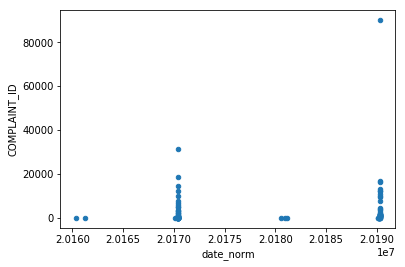

In [39]:
df.groupby('PRODUCT_ID').agg({'date_norm': 'max', 'COMPLAINT_ID': 'count'}).sort_values('date_norm').plot.scatter(x='date_norm', y='COMPLAINT_ID')

In [40]:
df.head()

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE_x,PRODUCT_ID,ISSUE_ID,COMPANY,COMPANY_RESPONSE_TO_USER,COMPANY_RESPONSE_TO_PUBLIC,WAS_RESPONSE_TIMELY,DATE_y,MAIN_PRODUCT,SUB_PRODUCT,MAIN_ISSUE,SUB_ISSUE,COMPLAINT_COUNTS,date_norm
0,3184195,XXXX and Transunion are reporting incorrectly...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190319
1,3184692,XXXX and Transunion are reporting incorrectly ...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190319
2,3183613,"XXXX, XXXX, and Experian need to remove the co...",NaN,03/18/2019,26,165,Experian Information Solutions Inc.,Closed with non-monetary relief,Company has responded to the consumer and the ...,Yes,03/18/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190318
3,3182430,"3 company with inconsistencies, violations and...",NaN,03/17/2019,26,253,"McCarthy, Burgess & Wolff, Inc.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190317
4,3182218,I have a personal loan from Patriot finance. T...,NaN,03/17/2019,26,165,"Patriot Finance, LLC",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190317


In [41]:
from sklearn.utils import resample

In [42]:
def rebalance(df, column, sample_size):
    from sklearn.utils import resample
    new_df = pd.DataFrame(columns=df.columns)
    for group in df[column].unique():
        if np.isnan(df[df[column].isnull()].iloc[0][column]):
            data = len(df[df[column].isnull()])
            if data <= sample_size:
                new_df = new_df.append(df[df[column].isnull()])
                sample_size -= data
            new_df = new_df.append(resample(df[df[column].isnull()], n_samples=sample_size))
        else:
            data = len(df[df[column] == group])
            if data <= sample_size:
                new_df = new_df.append(df[df[column] == group])
                sample_size -= data
            new_df = new_df.append(resample(df[df[column] == group], n_samples=sample_size))
    return new_df.sample(frac=1).reset_index(drop=True)

In [43]:
balanced = rebalance(df, 'SUB_PRODUCT', 3)

In [44]:
balanced

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE_x,PRODUCT_ID,ISSUE_ID,COMPANY,COMPANY_RESPONSE_TO_USER,COMPANY_RESPONSE_TO_PUBLIC,WAS_RESPONSE_TIMELY,DATE_y,MAIN_PRODUCT,SUB_PRODUCT,MAIN_ISSUE,SUB_ISSUE,COMPLAINT_COUNTS,date_norm
0,1601731,Citibank has upped the interest rate to 27.9 %...,No,10/09/2015,23,0,"CITIBANK, N.A.",Closed with explanation,Company chooses not to provide a public response,Yes,10/09/2015,Credit card,NaN,APR or interest rate,NaN,18838,20151009
1,1887281,Constant phone calls about a late credit card ...,No,04/20/2016,23,94,PNC Bank N.A.,Closed with explanation,NaN,Yes,04/20/2016,Credit card,NaN,Delinquent account,NaN,18838,20160420
2,2085635,I am writing to file a complaint against Trans...,Yes,08/29/2016,28,79,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,08/29/2016,Credit reporting,NaN,Credit reporting company's investigation,Problem with statement of dispute,31588,20160829
3,2188891,I just recently closed my CARECREDIT / SYNCHRO...,No,11/01/2016,23,220,SYNCHRONY FINANCIAL,Closed with monetary relief,Company has responded to the consumer and the ...,Yes,11/02/2016,Credit card,NaN,Other fee,NaN,18838,20161101
4,1979337,I entered my information into the database to ...,No,06/23/2016,23,6,AMERICAN EXPRESS COMPANY,Closed with non-monetary relief,NaN,Yes,06/23/2016,Credit card,NaN,Advertising and marketing,NaN,18838,20160623
5,1725355,I was told by XXXX Bank XXXX XXXX XXXX Account...,Yes,01/03/2016,28,162,Experian Information Solutions Inc.,Closed with explanation,Company chooses not to provide a public response,Yes,01/03/2016,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,31588,20160103
6,1506026,This is for wrongful information on my credit ...,No,08/06/2015,28,162,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company chooses not to provide a public response,Yes,08/17/2015,Credit reporting,NaN,Incorrect information on credit report,Reinserted previously deleted info,31588,20150806
7,2270378,CFPB case # XXXX XXXX weeks and no response. S...,Yes,12/30/2016,23,62,"CITIBANK, N.A.",Closed with explanation,Company has responded to the consumer and the ...,Yes,12/30/2016,Credit card,NaN,Credit determination,NaN,18838,20161230
8,1610178,"While checking my personal credit report, I di...",No,10/16/2015,28,149,"EQUIFAX, INC.",Closed with non-monetary relief,NaN,Yes,10/16/2015,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,31588,20151016
9,2293286,I paid for a product from XXXX and i was scamm...,No,01/18/2017,23,23,CAPITAL ONE FINANCIAL CORPORATION,Closed with explanation,NaN,Yes,01/18/2017,Credit card,NaN,Billing disputes,NaN,18838,20170118


In [45]:
temp = df[df['SUB_PRODUCT'].notnull()]

In [46]:
temp = df[(df['MAIN_PRODUCT'].notnull()) & (df['SUB_PRODUCT'].notnull())]

In [47]:
temp

,COMPLAINT_ID,COMPLAINT_TEXT,WAS_USER_DISPUTED,DATE_x,PRODUCT_ID,ISSUE_ID,COMPANY,COMPANY_RESPONSE_TO_USER,COMPANY_RESPONSE_TO_PUBLIC,WAS_RESPONSE_TIMELY,DATE_y,MAIN_PRODUCT,SUB_PRODUCT,MAIN_ISSUE,SUB_ISSUE,COMPLAINT_COUNTS,date_norm
0,3184195,XXXX and Transunion are reporting incorrectly...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190319
1,3184692,XXXX and Transunion are reporting incorrectly ...,NaN,03/19/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/19/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190319
2,3183613,"XXXX, XXXX, and Experian need to remove the co...",NaN,03/18/2019,26,165,Experian Information Solutions Inc.,Closed with non-monetary relief,Company has responded to the consumer and the ...,Yes,03/18/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190318
3,3182430,"3 company with inconsistencies, violations and...",NaN,03/17/2019,26,253,"McCarthy, Burgess & Wolff, Inc.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190317
4,3182218,I have a personal loan from Patriot finance. T...,NaN,03/17/2019,26,165,"Patriot Finance, LLC",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190317
5,3182593,Starting in XX/XX/XXXX I started receiving cal...,NaN,03/17/2019,37,18,"Ability Recovery Services, LLC",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/17/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was paid,7893,20190317
6,3181958,Card issuer received confirmation of payment i...,NaN,03/16/2019,26,165,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/16/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,89994,20190316
7,3181688,YOUR COMPLAINT I am disputing the debt owed to...,NaN,03/16/2019,39,349,"SELECT PORTFOLIO SERVICING, INC.",Closed with explanation,Company believes it acted appropriately as aut...,Yes,03/16/2019,Debt collection,Mortgage debt,Written notification about debt,Didn't receive enough information to verify debt,1112,20190316
8,3182176,I met the requirements for the ability to bene...,NaN,03/16/2019,90,300,"NRA Group, LLC",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/16/2019,Student loan,Federal student loan servicing,Struggling to repay your loan,Can't get other flexible options for repaying ...,12138,20190316
9,3181575,"XXXX, XXXX, and Transunion are not taking my c...",NaN,03/16/2019,26,253,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Closed with explanation,Company has responded to the consumer and the ...,Yes,03/16/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,89994,20190316


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df.groupby('SUB_PRODUCT').agg({'MAIN_PRODUCT': 'count', 'SUB_PRODUCT': 'count', 'PRODUCT_ID': 'count', 'COMPLAINT_COUNTS': 'median'}).sort_values('SUB_PRODUCT', ascending=False))
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'SUB_PRODUCT' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  


,MAIN_PRODUCT,SUB_PRODUCT,PRODUCT_ID,COMPLAINT_COUNTS
SUB_PRODUCT,,,,
Credit reporting,89994,89994,89994,89994
Checking account,20822,20822,20822,10709
I do not know,16887,16887,16887,16887
General-purpose credit card or charge card,16243,16243,16243,16243
Conventional fixed mortgage,14562,14562,14562,14562
Other debt,13385,13385,13385,13385
"Other (i.e. phone, health club, etc.)",12393,12393,12393,12393
Federal student loan servicing,12138,12138,12138,12138
Conventional home mortgage,12099,12099,12099,12098


In [49]:
len(df[df['COMPLAINT_COUNTS'] > 5000]['MAIN_PRODUCT'].unique())

10

In [50]:
len(df[df['COMPLAINT_COUNTS'] > 5000]['SUB_PRODUCT'].unique())

17

In [51]:
len(df[df['COMPLAINT_COUNTS'] > 5000]['PRODUCT_ID'].unique())

19

In [52]:
len(df[df['SUB_PRODUCT'].isin(df['SUB_PRODUCT'].value_counts()[df['SUB_PRODUCT'].value_counts() > 5000].index)])

262313

In [53]:
len(df)

383066

In [54]:
df['SUB_PRODUCT'].value_counts()[df['SUB_PRODUCT'].value_counts() > 1000].index

Index(['Credit reporting', 'Checking account', 'I do not know',
       'General-purpose credit card or charge card',
       'Conventional fixed mortgage', 'Other debt',
       'Other (i.e. phone, health club, etc.)',
       'Federal student loan servicing', 'Conventional home mortgage',
       'Credit card debt', 'FHA mortgage', 'Medical debt', 'Credit card',
       'Medical', 'Non-federal student loan', 'Vehicle loan',
       'Conventional adjustable mortgage (ARM)', 'Installment loan', 'Loan',
       'Private student loan', 'Store credit card', 'Payday loan',
       'Other bank product/service', 'Other mortgage', 'VA mortgage',
       'Domestic (US) money transfer', 'Home equity loan or line of credit',
       'Payday loan debt', 'Other personal consumer report', 'Savings account',
       'Auto debt', 'Other type of mortgage', 'International money transfer',
       'Virtual currency', 'Home equity loan or line of credit (HELOC)',
       'Mobile or digital wallet', 'Mortgage debt', 'A

In [55]:
len(df[df.groupby('SUB_PRODUCT')['SUB_PRODUCT'].transform('count') > 1000])

320199

In [56]:
len(df[df.groupby('SUB_PRODUCT')['SUB_PRODUCT'].transform('count') > 1000])

320199

In [57]:
len(df[df['SUB_PRODUCT'].isin(df['SUB_PRODUCT'].value_counts()[df['SUB_PRODUCT'].value_counts() > 1000].index)])

320199

In [58]:
df['SUB_PRODUCT'].value_counts()[df['SUB_PRODUCT'].value_counts() > 1000].index

Index(['Credit reporting', 'Checking account', 'I do not know',
       'General-purpose credit card or charge card',
       'Conventional fixed mortgage', 'Other debt',
       'Other (i.e. phone, health club, etc.)',
       'Federal student loan servicing', 'Conventional home mortgage',
       'Credit card debt', 'FHA mortgage', 'Medical debt', 'Credit card',
       'Medical', 'Non-federal student loan', 'Vehicle loan',
       'Conventional adjustable mortgage (ARM)', 'Installment loan', 'Loan',
       'Private student loan', 'Store credit card', 'Payday loan',
       'Other bank product/service', 'Other mortgage', 'VA mortgage',
       'Domestic (US) money transfer', 'Home equity loan or line of credit',
       'Payday loan debt', 'Other personal consumer report', 'Savings account',
       'Auto debt', 'Other type of mortgage', 'International money transfer',
       'Virtual currency', 'Home equity loan or line of credit (HELOC)',
       'Mobile or digital wallet', 'Mortgage debt', 'A

In [59]:
train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
train

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [60]:
insert = ['one', 'two', 'three']
insert

['one', 'two', 'three']

In [61]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
z = labels.fit_transform(insert)
train = np.concatenate((train, z.reshape(len(z), 1)), axis=1)
train

array([[1, 2, 3, 0],
       [4, 5, 6, 2],
       [7, 8, 9, 1]])

In [69]:
temp = pd.DataFrame(columns=['col1', 'col2', 'col3'], data=[[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [70]:
temp

,col1,col2,col3
0,1,2,3
1,4,5,6
2,7,8,9


In [71]:
temp2 = ['hi', 'greg', 'list']

In [72]:
temp2

['hi', 'greg', 'list']

In [73]:
temp2.extend(temp.iloc[0])

In [74]:
temp2

['hi', 'greg', 'list', 1, 2, 3]